In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets

# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

# Combine datasets and normalize pixel values between 0 and 1
X_data = np.concatenate((X_train_full, X_test), axis=0) / 255.0
y_data = np.concatenate((y_train_full, y_test), axis=0)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)




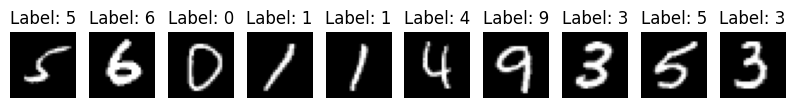

In [25]:
from matplotlib import pyplot as plt

# Function to plot images
def plot_images(images, labels, n=10):
    plt.figure(figsize=(10, 10))
    for i in range(n):  
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Remove channel dimension for display
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide axis for better visualization
    plt.show()

# Plot first 10 images from the training set
plot_images(X_train, y_train, n=10)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [27]:
model = Sequential()
model.add(Conv2D(32, (3,3), 1, input_shape=(28,28,1)))
 
model.add(tf.keras.layers.ReLU()) 
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1))

model.add(tf.keras.layers.ReLU()) 
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1))
 
model.add(tf.keras.layers.ReLU()) 
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from tensorflow import keras

learning_rate=0.001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.5)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[tensorboard_callback])


Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7907 - loss: 0.6212 - val_accuracy: 0.9685 - val_loss: 0.1087
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9708 - loss: 0.0973 - val_accuracy: 0.9786 - val_loss: 0.0719
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9800 - loss: 0.0674 - val_accuracy: 0.9835 - val_loss: 0.0562
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9856 - loss: 0.0469 - val_accuracy: 0.9858 - val_loss: 0.0457
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9840 - val_loss: 0.0566
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.9875 - val_loss: 0.0428
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9849 - val_loss: 0.0563
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9928 - loss: 0.0237 -

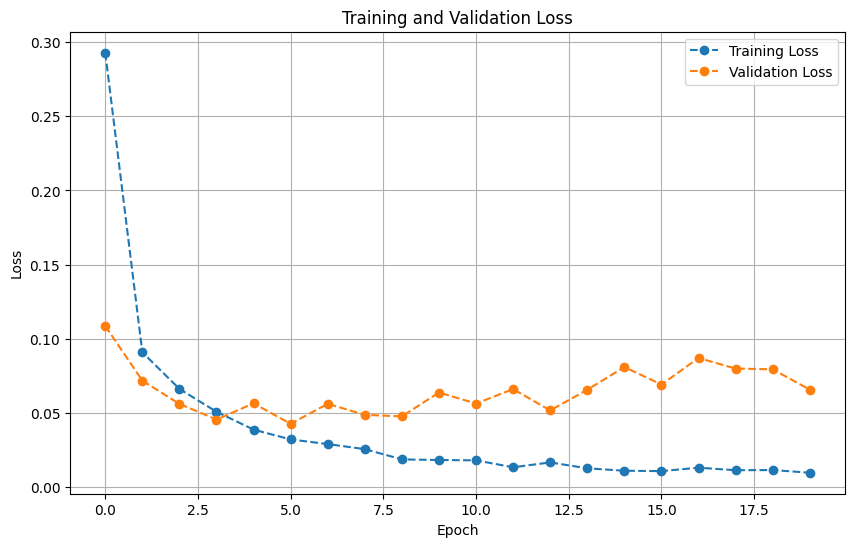

In [31]:
from matplotlib import pyplot as plt

# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(hist.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0901
Test Loss: 0.09762446582317352
Test Accuracy: 0.9858571290969849


Training Accuracy: 0.9993
Testing Accuracy: 0.9859
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1419
           1       1.00      0.99      0.99      1607
           2       0.98      0.98      0.98      1403
           3       0.98      0.99      0.98      1437
           4       0.99      0.99      0.99      1326
           5       0.98      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.99      0.98      0.98      1488
           8       0.99      0.99      0.99      1319
           9       0.99      0.98      0.98      1401

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



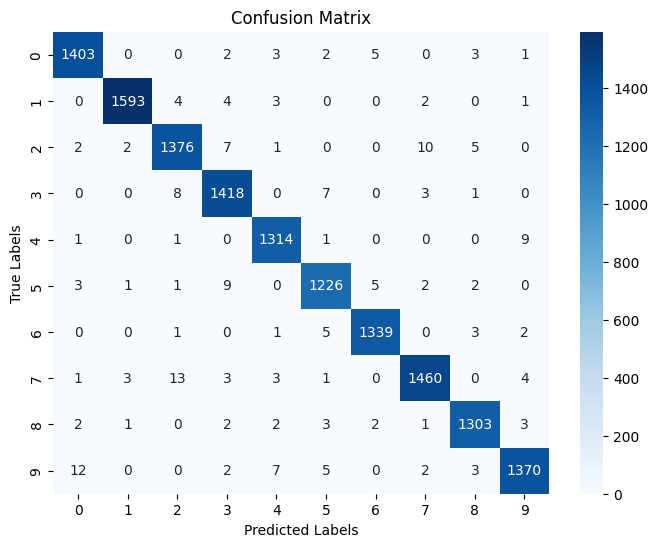

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Evaluate the model based on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model based on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Predict the labels for the testing data
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)



print(classification_report(y_test, y_pred_classes, digits=2))
conf_matrix = confusion_matrix(y_test, y_pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [34]:
def Training(L_rate, epochs):
  model = Sequential()
  model.add(Conv2D(32, (3,3), 1, input_shape=(28,28,1)))
  
  model.add(tf.keras.layers.ReLU()) 
  model.add(MaxPooling2D())
  model.add(Conv2D(64, (3,3), 1))

  model.add(tf.keras.layers.ReLU()) 
  model.add(MaxPooling2D())
  model.add(Conv2D(128, (3,3), 1))
  
  model.add(tf.keras.layers.ReLU()) 
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=L_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

  # Plot training and validation loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Training and Validation Loss\nLearning Rate = {L_rate}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Evaluate the model based on the training data
  train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
  print(f"Training Accuracy: {train_accuracy:.4f}")

  # Evaluate the model based on the testing data
  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
  print(f"Testing Accuracy: {test_accuracy:.4f}")

  # Predict the labels for the testing data
  y_pred = model.predict(X_test)
  y_pred_classes = tf.argmax(y_pred, axis=1)



  print(classification_report(y_test, y_pred_classes, digits=2))
  conf_matrix = confusion_matrix(y_test, y_pred_classes)

  class_labels = [str(i) for i in range(10)]
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

Epoch 1/20


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5940 - loss: 1.2965 - val_accuracy: 0.9261 - val_loss: 0.2410
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9233 - loss: 0.2571 - val_accuracy: 0.9514 - val_loss: 0.1614
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9453 - loss: 0.1830 - val_accuracy: 0.9576 - val_loss: 0.1272
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9548 - loss: 0.1479 - val_accuracy: 0.9665 - val_loss: 0.1041
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9621 - loss: 0.1240 - val_accuracy: 0.9689 - val_loss: 0.0981
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9662 - loss: 0.1134 - val_accuracy: 0.9694 - val_loss: 0.0956
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9703 - loss: 0.0970 - val_accuracy: 0.9764 - val_loss: 0.0742
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9737 - loss: 0.0869 - val_accurac

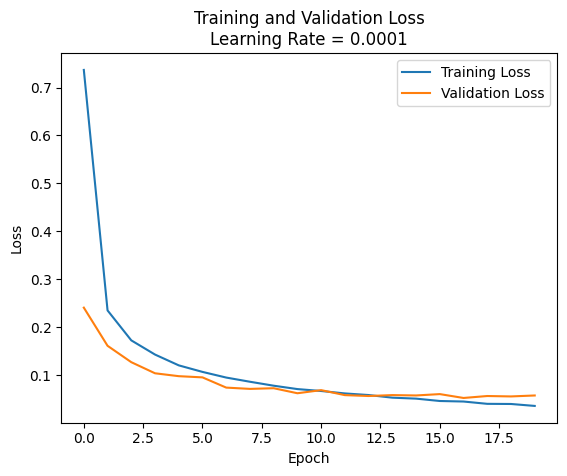

Training Accuracy: 0.9920
Testing Accuracy: 0.9801
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1419
           1       0.99      1.00      0.99      1607
           2       0.98      0.97      0.97      1403
           3       0.99      0.97      0.98      1437
           4       0.97      0.99      0.98      1326
           5       0.96      0.99      0.97      1249
           6       0.99      0.99      0.99      1351
           7       0.97      0.99      0.98      1488
           8       0.99      0.96      0.97      1319
           9       0.99      0.96      0.97      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



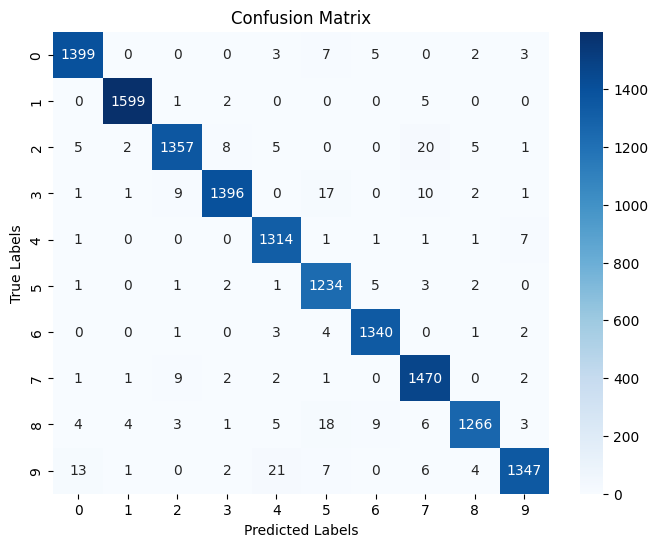

Epoch 1/20


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8166 - loss: 0.5609 - val_accuracy: 0.9569 - val_loss: 0.1591
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9430 - loss: 0.2133 - val_accuracy: 0.9557 - val_loss: 0.1653
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9446 - loss: 0.2179 - val_accuracy: 0.9392 - val_loss: 0.2166
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9443 - loss: 0.2176 - val_accuracy: 0.9548 - val_loss: 0.1934
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9483 - loss: 0.2146 - val_accuracy: 0.9596 - val_loss: 0.1859
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9457 - loss: 0.2171 - val_accuracy: 0.9616 - val_loss: 0.1898
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9500 - loss: 0.2142 - val_accuracy: 0.9609 - val_loss: 0.1743
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9527 - loss: 0.1909 - val_accurac

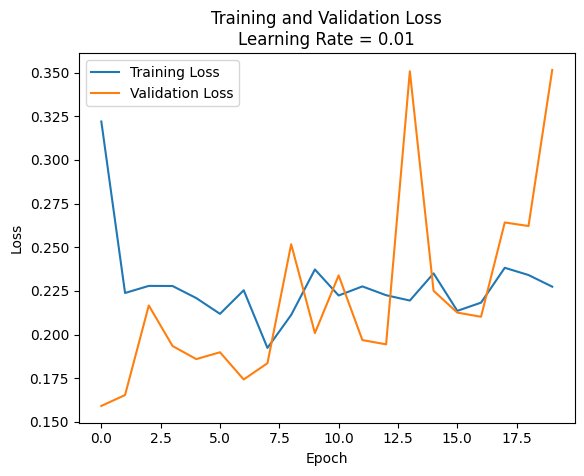

Training Accuracy: 0.9598
Testing Accuracy: 0.9487
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1419
           1       0.99      0.97      0.98      1607
           2       0.90      0.95      0.92      1403
           3       0.98      0.93      0.95      1437
           4       0.99      0.94      0.96      1326
           5       0.84      0.99      0.91      1249
           6       0.99      0.93      0.96      1351
           7       0.93      0.97      0.95      1488
           8       0.96      0.92      0.94      1319
           9       0.95      0.93      0.94      1401

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



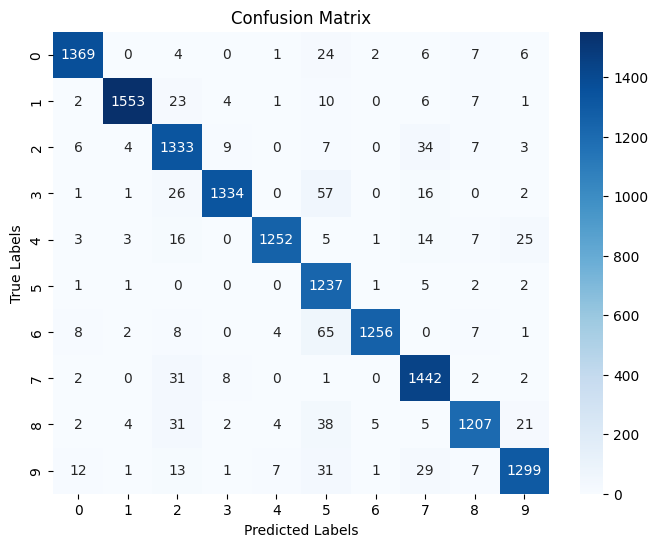

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1033 - loss: 14.4521 - val_accuracy: 0.1109 - val_loss: 2.3190
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1034 - loss: 2.3145 - val_accuracy: 0.0944 - val_loss: 2.3098
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1041 - loss: 2.3126 - val_accuracy: 0.1014 - val_loss: 2.3112
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1023 - loss: 2.3137 - val_accuracy: 0.1014 - val_loss: 2.3130
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1021 - loss: 2.3153 - val_accuracy: 0.0994 - val_loss: 2.3107
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1018 - loss: 2.3151 - val_accuracy: 0.1011 - val_loss: 2.3142
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1058 - loss: 2.3130 - val_accuracy: 0.1109 - val_loss: 2.3062
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1018 - loss: 2.3138 

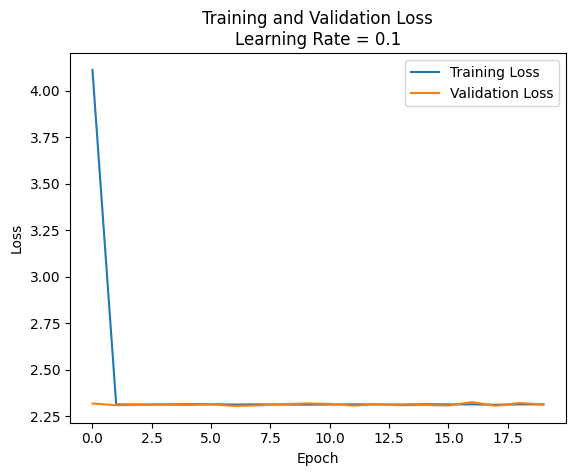

Training Accuracy: 0.0990
Testing Accuracy: 0.0942
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1419
           1       0.00      0.00      0.00      1607
           2       0.00      0.00      0.00      1403
           3       0.00      0.00      0.00      1437
           4       0.00      0.00      0.00      1326
           5       0.00      0.00      0.00      1249
           6       0.00      0.00      0.00      1351
           7       0.00      0.00      0.00      1488
           8       0.09      1.00      0.17      1319
           9       0.00      0.00      0.00      1401

    accuracy                           0.09     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.09      0.02     14000



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

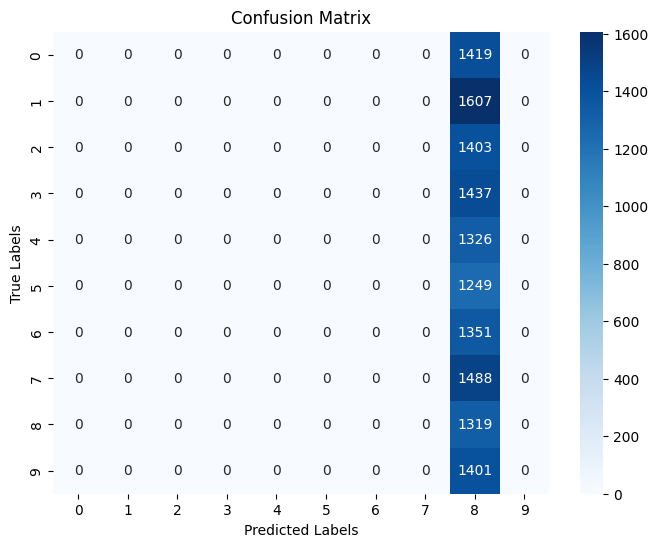

In [35]:
for Learning_Rate in (0.0001, 0.01, 0.1):
    Training(Learning_Rate, 20)

Compareyournetwork with state-of-the-art networks

In [36]:
import tensorflow as tf
import os
from tensorflow.keras.applications import ResNet50, DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import cv2

# Function to fine-tune models
def fine_tune_model(base_model):
    base_model.trainable = False  # Freeze base layers

    # Custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    # Build model
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load DenseNet121
densenet_base = DenseNet169(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
densenet_model = fine_tune_model(densenet_base)

# Load ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
resnet_model = fine_tune_model(resnet_base)

In [37]:
def preprocess_images(images):
    images_rgb = np.stack([images] * 3, axis=-1)  # Convert to RGB
    resized_images = np.array([cv2.resize(img, (64, 64)) for img in images_rgb])  # Resize
    return resized_images



# Split into train, validation, and test sets
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train_processed = preprocess_images(X_train1)
X_val_processed = preprocess_images(X_val1)
X_test_processed = preprocess_images(X_test1)

print("Training data shape after resizing:", X_train_processed.shape)
print("Validation data shape after resizing:", X_val_processed.shape)
print("Testing data shape after resizing:", X_test_processed.shape)





Training data shape after resizing: (42000, 64, 64, 3)
Validation data shape after resizing: (14000, 64, 64, 3)
Testing data shape after resizing: (14000, 64, 64, 3)


In [38]:

# Train ResNet model
resnet_history = resnet_model.fit(
    X_train_processed,y_train1, 
    validation_data=(X_val_processed,y_val1), 
    epochs=20
)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 221s 164ms/step - accuracy: 0.6760 - loss: 0.9118 - val_accuracy: 0.9189 - val_loss: 0.2513
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 207s 158ms/step - accuracy: 0.9119 - loss: 0.2719 - val_accuracy: 0.9227 - val_loss: 0.2311
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 219s 167ms/step - accuracy: 0.9293 - loss: 0.2198 - val_accuracy: 0.9291 - val_loss: 0.2206
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 225s 171ms/step - accuracy: 0.9356 - loss: 0.1947 - val_accuracy: 0.9382 - val_loss: 0.1911
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 214s 163ms/step - accuracy: 0.9436 - loss: 0.1756 - val_accuracy: 0.9369 - val_loss: 0.1955
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 193s 147ms/step - accuracy: 0.9484 - loss: 0.1570 - val_accuracy: 0.9438 - val_loss: 0.1728
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 183s 140ms/step - accuracy: 0.9506 - loss: 0.1546 - val_accuracy: 0.9391 - val_loss: 0.1945
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 183s 139ms/step - ac

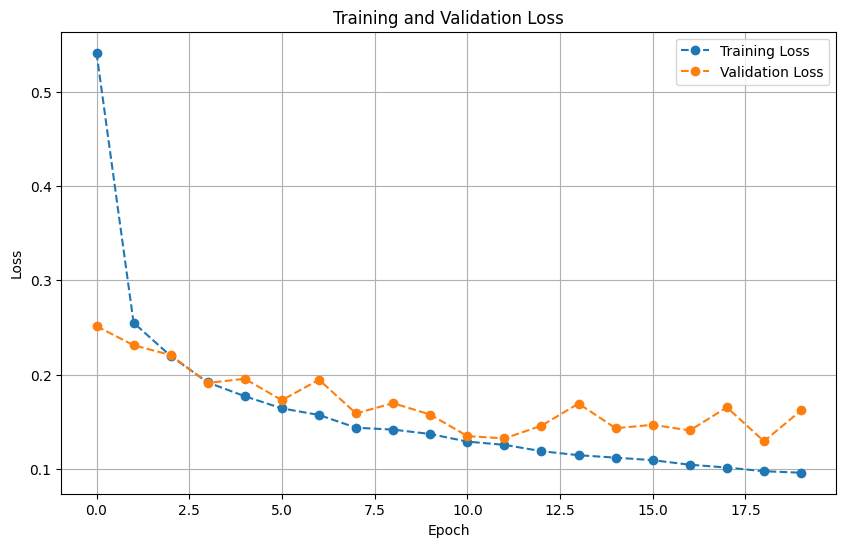

In [39]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(resnet_history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train DenseNet model
densenet_history = densenet_model.fit(
    X_train_processed,y_train1, 
    validation_data=(X_val_processed,y_val1), 
    epochs=20
)